In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.ticker import ScalarFormatter

In [13]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [2]:
df = pd.read_csv('C:/Users/Home/Desktop/Data/2차/CardData_new.csv', encoding = 'cp949')

In [6]:
df['자격기준'].unique()

array(['11.자영업자', '01.공무원', '08.은행거래', '06.기업체', '02.교육기관', '10.배우자',
       '05.언론기관', '09.전문직', '03.금융기관', '04.의료기관', '99.기타', '12.체크전환',
       '07.소기업'], dtype=object)

In [7]:
le = LabelEncoder()
df['자격기준'] = le.fit_transform(df['자격기준'])

In [10]:
for i, label in enumerate(le.classes_):
    print(i, '->' , label)

0 -> 01.공무원
1 -> 02.교육기관
2 -> 03.금융기관
3 -> 04.의료기관
4 -> 05.언론기관
5 -> 06.기업체
6 -> 07.소기업
7 -> 08.은행거래
8 -> 09.전문직
9 -> 10.배우자
10 -> 11.자영업자
11 -> 12.체크전환
12 -> 99.기타


# 이용금액_신용_R12M

In [40]:
df[df['자격기준'] == 12]['이용금액_신용_R12M'].mean()

14686153.848783769

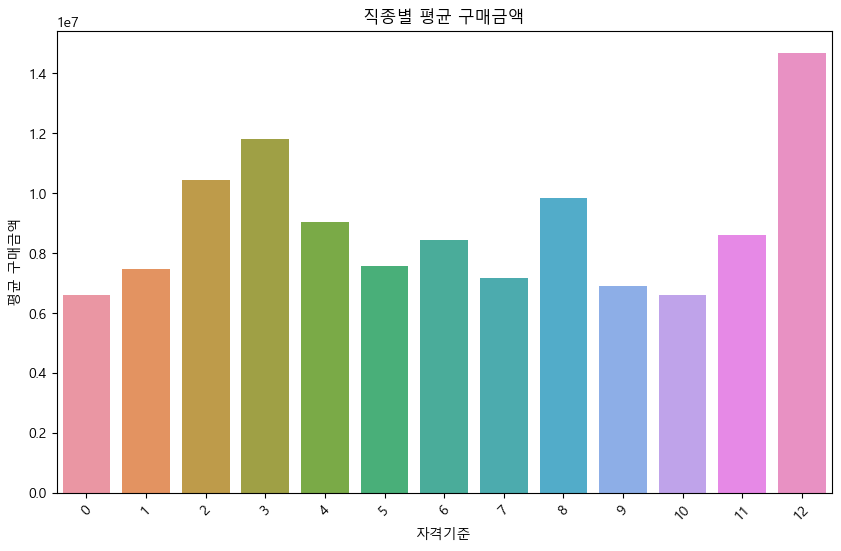

In [38]:
avg = df.groupby('자격기준')['이용금액_신용_R12M'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('자격기준')
plt.ylabel('평균 구매금액')
# plt.ylim(min(avg.values),max(avg.values))
plt.title('직종별 평균 구매금액')
plt.xticks(rotation=45)

plt.show()

평균

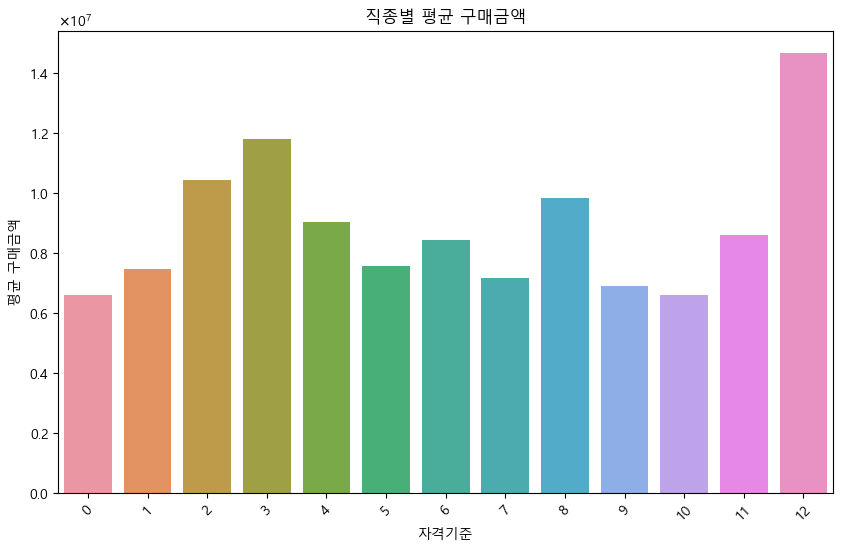

In [28]:
avg = df.groupby('자격기준')['이용금액_신용_R12M'].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('자격기준')
plt.ylabel('평균 구매금액')
plt.title('직종별 평균 구매금액')

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(rotation=45)
plt.show()

중위수

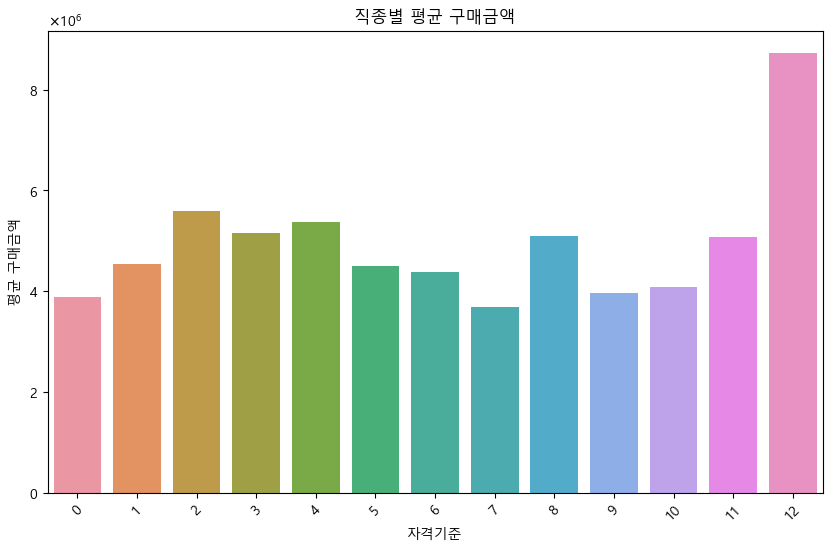

In [67]:
med = df.groupby('자격기준')['이용금액_신용_R12M'].median()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=med.index, y=med.values)
plt.xlabel('자격기준')
plt.ylabel('평균 구매금액')
plt.title('직종별 평균 구매금액')

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(rotation=45)
plt.show()

In [66]:
df.loc[df['자격기준'] == 12, '자격구분상세'].value_counts()

99.기타       5822
00.SK제휴사    3099
Name: 자격구분상세, dtype: int64

In [42]:
# 직전 12달 이용금액 평균 비교  - 기타 제외
## 1등 -> 의료기관(3), 2등 -> 금융기관(2), 3등 -> 전문직(8)

## 의료기관 상세

In [43]:
df.loc[df['자격기준'] == 3, '자격구분상세'].value_counts()

04.의료기관_의료관련면허소시자    4113
04.의료기관              3207
04.의료기관_의사약사한의사      2895
Name: 자격구분상세, dtype: int64

In [44]:
df2 = df.loc[df['자격기준'] == 3, :]

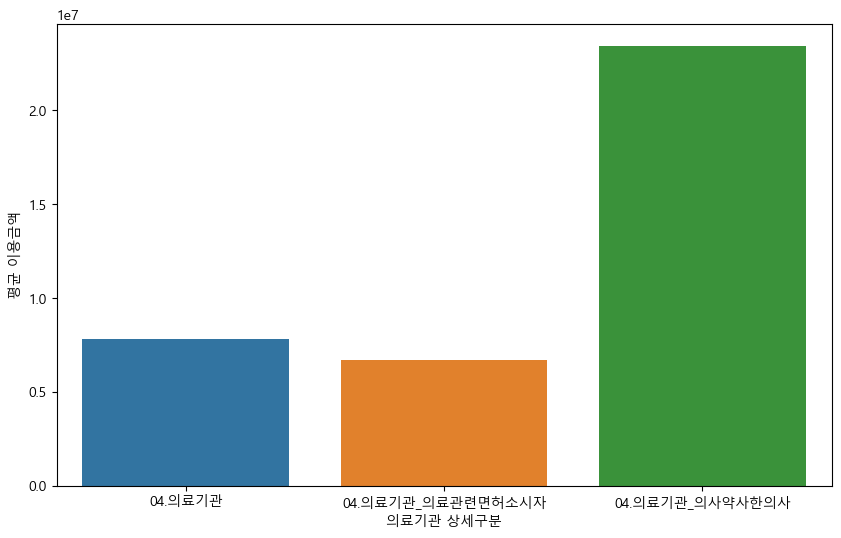

In [52]:
avg2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= avg2.index, y=avg2.values)
plt.xlabel('의료기관 상세구분')
plt.ylabel('평균 이용금액')
plt.xticks(rotation = 0)
plt.show()

## 금융기관 상세

In [54]:
df.loc[df['자격기준'] == 2, '자격구분상세'].value_counts()

03.금융기관_은행증권보험은행연합회     2662
00.하나카드및관계사             1544
03.금융기관_여신전문금융기관        1310
03.금융기관_금고저축은행신협상호금융     696
03.금융기관                   87
Name: 자격구분상세, dtype: int64

In [53]:
df2 = df.loc[df['자격기준'] == 2, :]

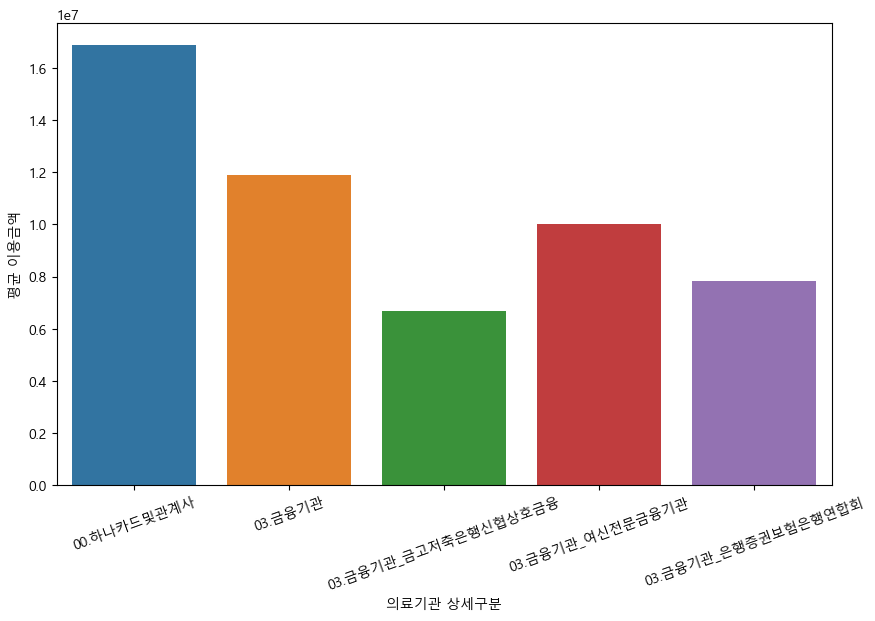

In [59]:
avg2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= avg2.index, y=avg2.values)
plt.xlabel('의료기관 상세구분')
plt.ylabel('평균 이용금액')
plt.xticks(rotation = 20)
plt.show()

## 전문직 상세

In [62]:
df.loc[df['자격기준'] == 8, '자격구분상세'].value_counts()

09.전문직                          966
09.전문직_공인회계사기술사건축사세무사           438
09.전문직_변호사변리사                   197
09.전문직_손해사정인법무사노무사통역사행정사보험계리    184
Name: 자격구분상세, dtype: int64

In [63]:
df2 = df.loc[df['자격기준'] == 8, :]

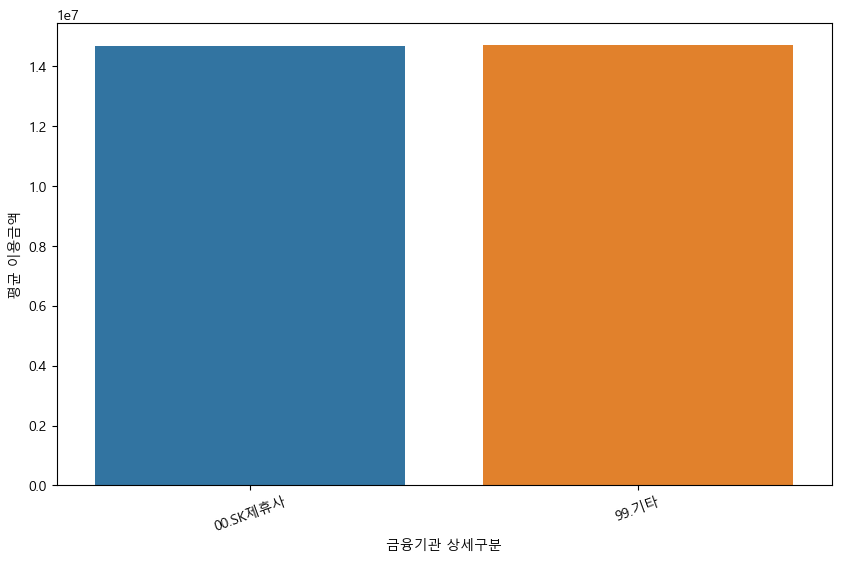

In [105]:
avg2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= avg2.index, y=avg2.values)
plt.xlabel('금융기관 상세구분')
plt.ylabel('평균 이용금액')
plt.xticks(rotation = 20)
plt.show()

## 언론기관 상세 (1개 클래스 뿐)

In [70]:
df.loc[df['자격기준'] == 4, '자격구분상세'].value_counts()

05.언론기관    706
Name: 자격구분상세, dtype: int64

In [71]:
df2 = df.loc[df['자격기준'] == 4, :]

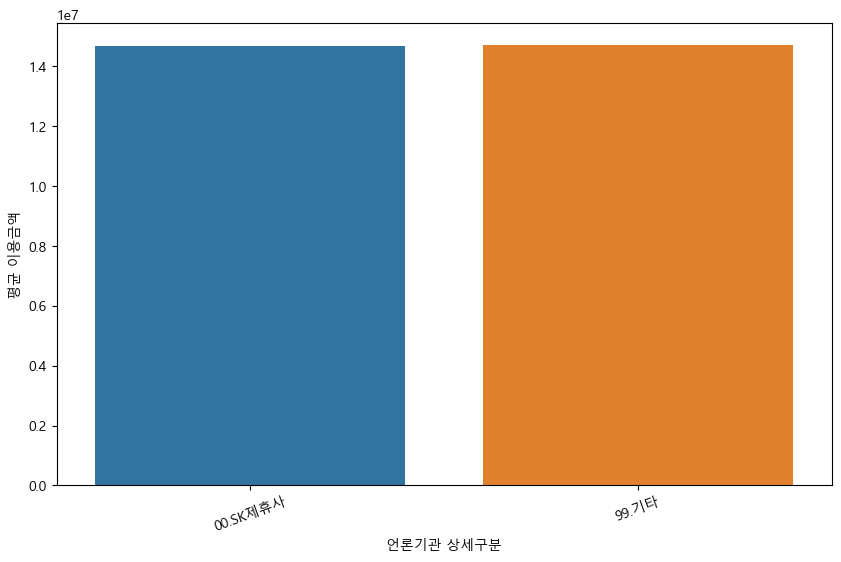

In [104]:
avg2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= avg2.index, y=avg2.values)
plt.xlabel('언론기관 상세구분')
plt.ylabel('평균 이용금액')
plt.xticks(rotation = 20)
plt.show()

## 기타

In [73]:
df.loc[df['자격기준'] == 12, '자격구분상세'].value_counts()

99.기타       5822
00.SK제휴사    3099
Name: 자격구분상세, dtype: int64

In [74]:
df2 = df.loc[df['자격기준'] == 12, :]

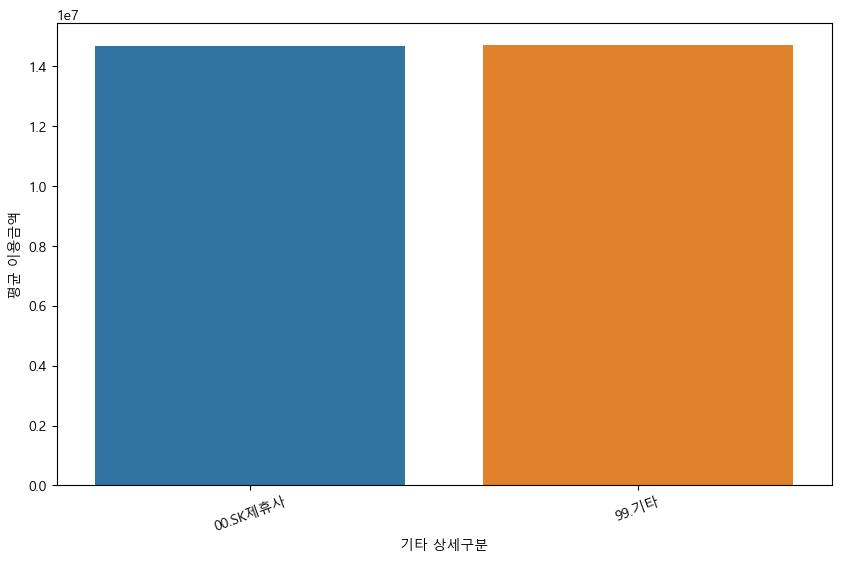

In [103]:
avg2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].mean()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= avg2.index, y=avg2.values)
plt.xlabel('기타 상세구분')
plt.ylabel('평균 이용금액')
plt.xticks(rotation = 20)
plt.show()

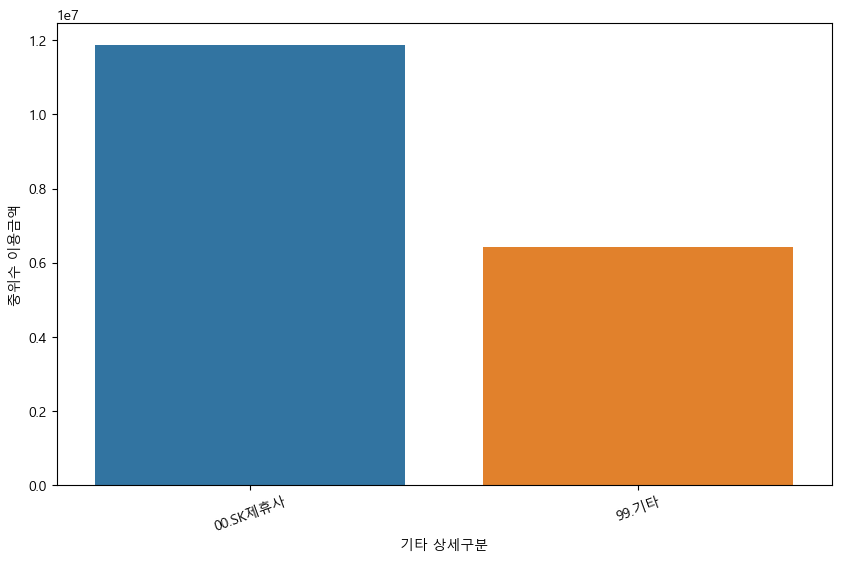

In [102]:
med2 = df2.groupby('자격구분상세')['이용금액_신용_R12M'].median()

plt.figure(figsize = (10,6))
ax = sns.barplot(x= med2.index, y=med2.values)
plt.xlabel('기타 상세구분')
plt.ylabel('중위수 이용금액')
plt.xticks(rotation = 20)
plt.show()

In [78]:
df2.loc[df2['자격구분상세'] == '00.SK제휴사', '_1순위카드ID'].value_counts()

1112    2022
1113     332
1114     267
156       67
1109      26
        ... 
230        1
1118       1
1511       1
111        1
316        1
Name: _1순위카드ID, Length: 131, dtype: int64

# 이용금액대

## 의료기관

In [91]:
df.loc[df['자격기준'] == 3, '이용금액대'].value_counts().sort_index()

01.100만원+    2628
02.50만원+     1845
03.30만원+     1209
04.10만원+     1111
05.10만원-     1917
09.미사용       1505
Name: 이용금액대, dtype: int64

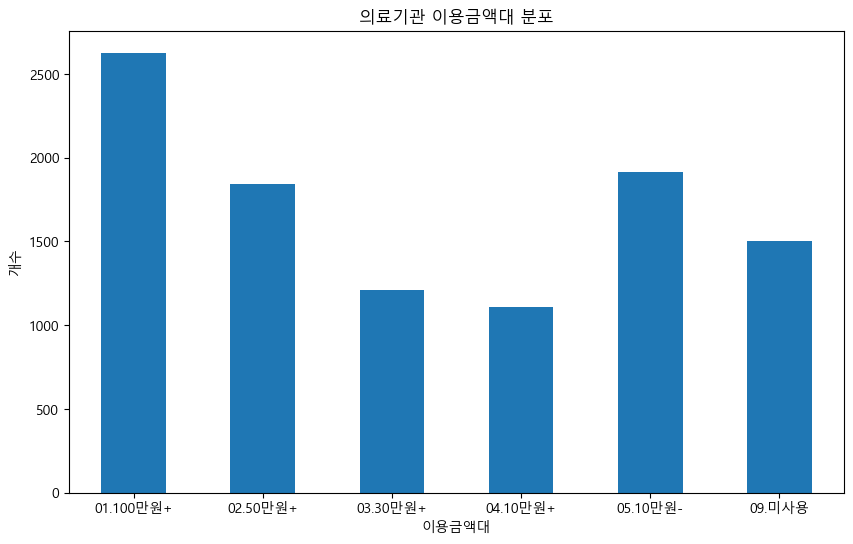

In [92]:
result = df.loc[df['자격기준'] == 3, '이용금액대'].value_counts().sort_index()

plt.figure(figsize = (10,6))
result.plot(kind = 'bar')
plt.xlabel('이용금액대')
plt.ylabel('개수')
plt.title('의료기관 이용금액대 분포')
plt.xticks(rotation = 0)
plt.show()

## 금융기관

In [93]:
df.loc[df['자격기준'] == 2, '이용금액대'].value_counts().sort_index()

01.100만원+    1933
02.50만원+     1041
03.30만원+      677
04.10만원+      586
05.10만원-      886
09.미사용       1176
Name: 이용금액대, dtype: int64

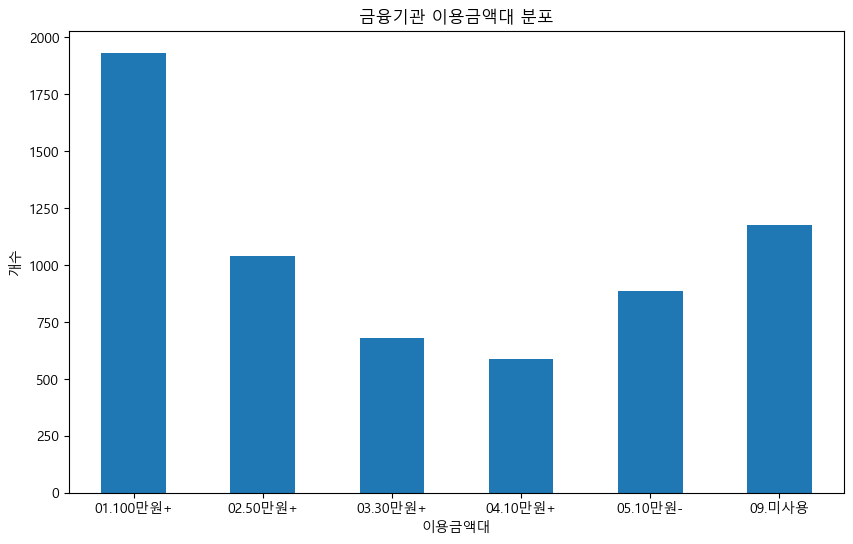

In [95]:
result = df.loc[df['자격기준'] == 2, '이용금액대'].value_counts().sort_index()

plt.figure(figsize = (10,6))
result.plot(kind = 'bar')
plt.xlabel('이용금액대')
plt.ylabel('개수')
plt.title('금융기관 이용금액대 분포')
plt.xticks(rotation = 0)
plt.show()

## 언론기관

In [96]:
df.loc[df['자격기준'] == 8, '이용금액대'].value_counts().sort_index()

01.100만원+    448
02.50만원+     330
03.30만원+     235
04.10만원+     189
05.10만원-     331
09.미사용       252
Name: 이용금액대, dtype: int64

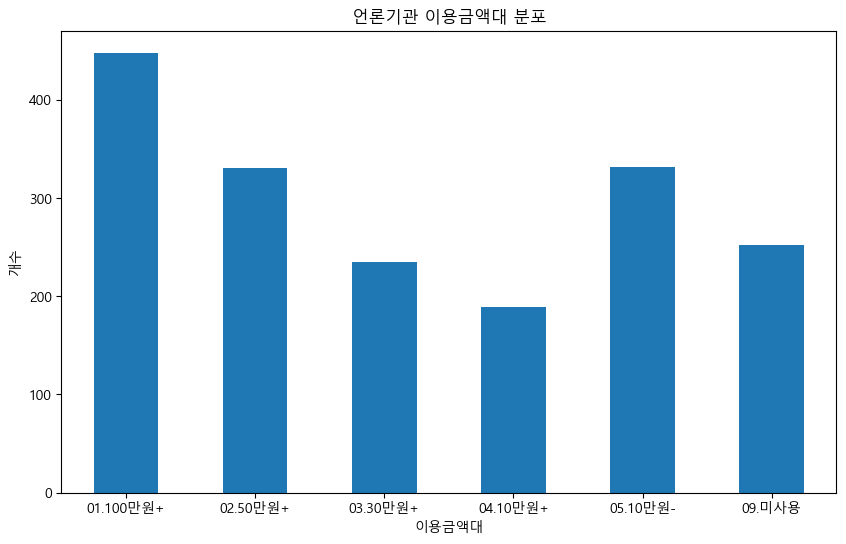

In [99]:
result = df.loc[df['자격기준'] == 8, '이용금액대'].value_counts().sort_index()

plt.figure(figsize = (10,6))
result.plot(kind = 'bar')
plt.xlabel('이용금액대')
plt.ylabel('개수')
plt.title('언론기관 이용금액대 분포')
plt.xticks(rotation = 0)
plt.show()

## 기타

In [98]:
df.loc[df['자격기준'] == 12, '이용금액대'].value_counts().sort_index()

01.100만원+    3492
02.50만원+     1749
03.30만원+      857
04.10만원+      977
05.10만원-     1091
09.미사용        755
Name: 이용금액대, dtype: int64

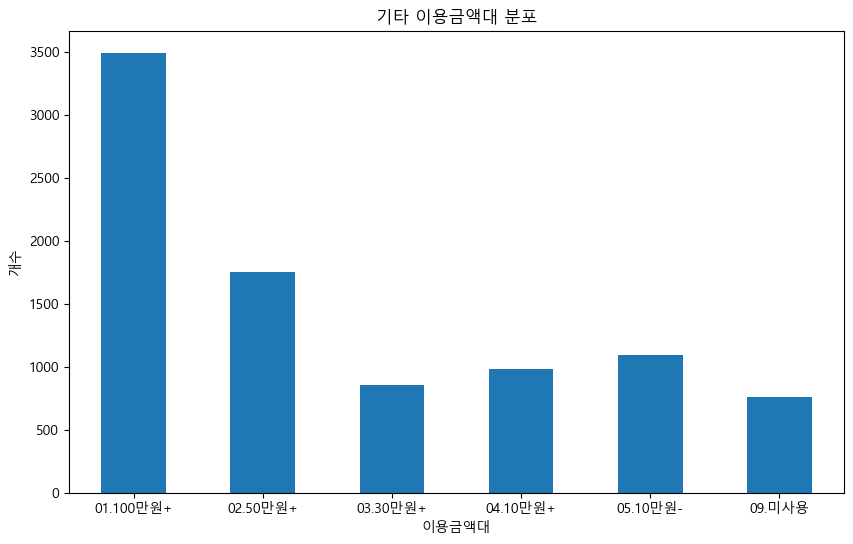

In [100]:
result = df.loc[df['자격기준'] == 12, '이용금액대'].value_counts().sort_index()

plt.figure(figsize = (10,6))
result.plot(kind = 'bar')
plt.xlabel('이용금액대')
plt.ylabel('개수')
plt.title('기타 이용금액대 분포')
plt.xticks(rotation = 0)
plt.show()

# 이용건수_신용_R12M

In [106]:
df.loc[df['자격기준'] == 3, '이용건수_신용_R12M'].value_counts().sort_index()

-1         2
 0       682
 1       178
 2       114
 3        86
        ... 
 2336      1
 2378      1
 2725      1
 2854      1
 3098      1
Name: 이용건수_신용_R12M, Length: 1226, dtype: int64

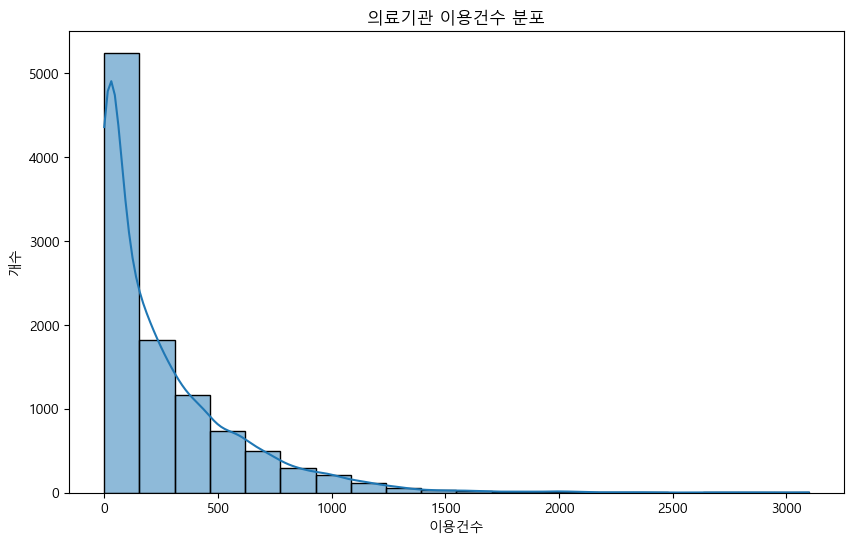

In [108]:
use = df.loc[df['자격기준'] == 3, '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True)  
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('의료기관 이용건수 분포')
plt.show()

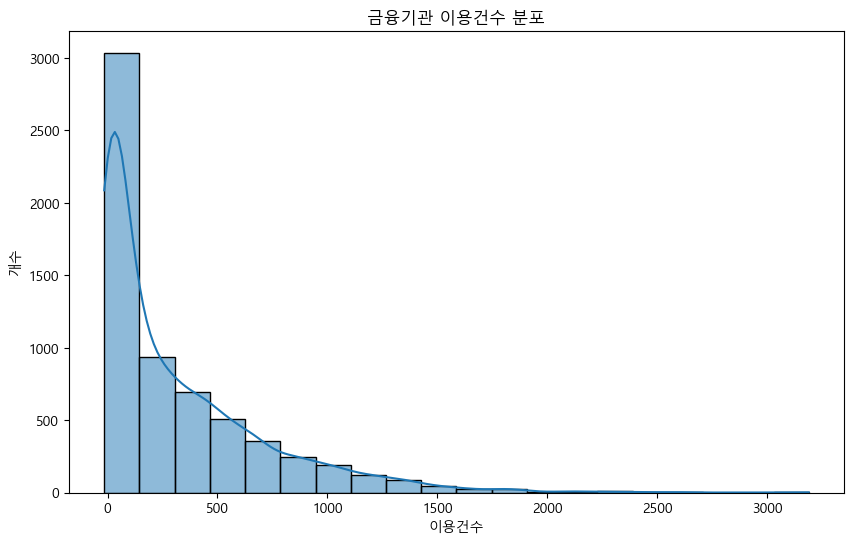

In [109]:
use = df.loc[df['자격기준'] == 2, '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True) 
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('금융기관 이용건수 분포')
plt.show()

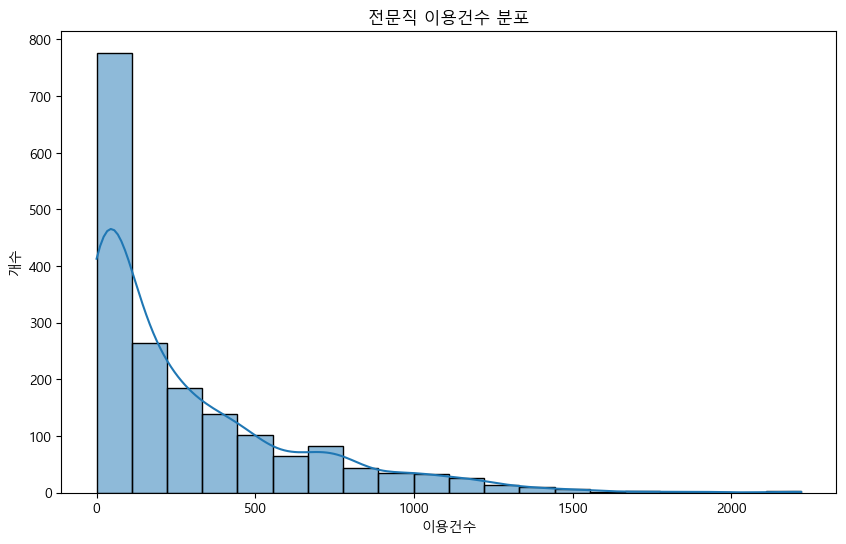

In [110]:
use = df.loc[df['자격기준'] == 8, '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True)  
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('전문직 이용건수 분포')
plt.show()

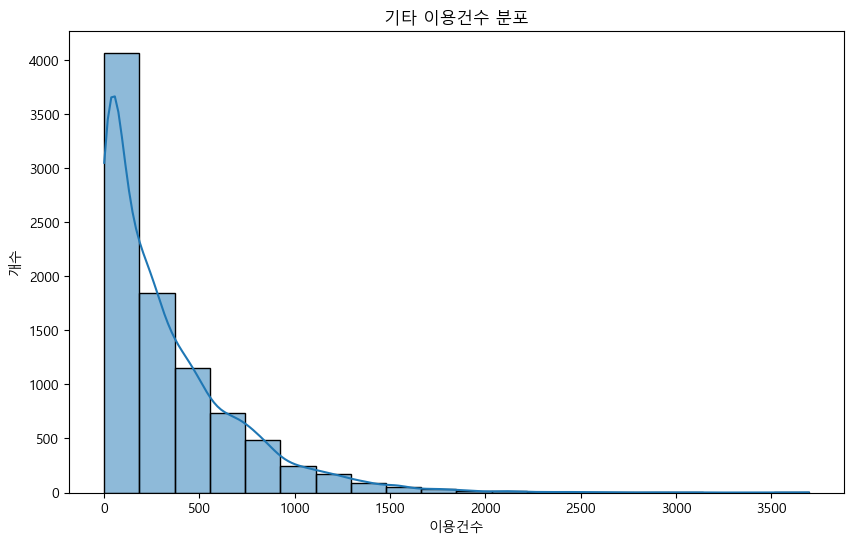

In [111]:
use = df.loc[df['자격기준'] == 12, '이용건수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(use, bins=20, kde=True)  
plt.xlabel('이용건수')
plt.ylabel('개수')
plt.title('기타 이용건수 분포')
plt.show()

# 이용개월수_신용_R12M

In [119]:
df.loc[df['자격기준'] == 3, '이용개월수_신용_R12M'].value_counts().sort_index()

0      680
1      265
2      221
3      180
4      181
5      181
6      217
7      291
8      277
9      339
10     469
11     716
12    6198
Name: 이용개월수_신용_R12M, dtype: int64

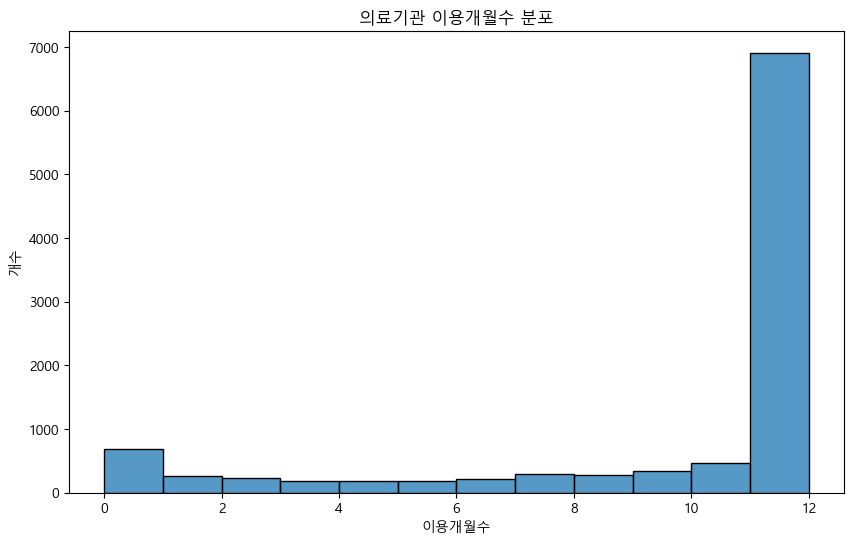

In [117]:
mon= df.loc[df['자격기준'] == 3, '이용개월수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(mon, bins=12, kde=False)  
plt.xlabel('이용개월수')
plt.ylabel('개수')
plt.title('의료기관 이용개월수 분포')
plt.show()

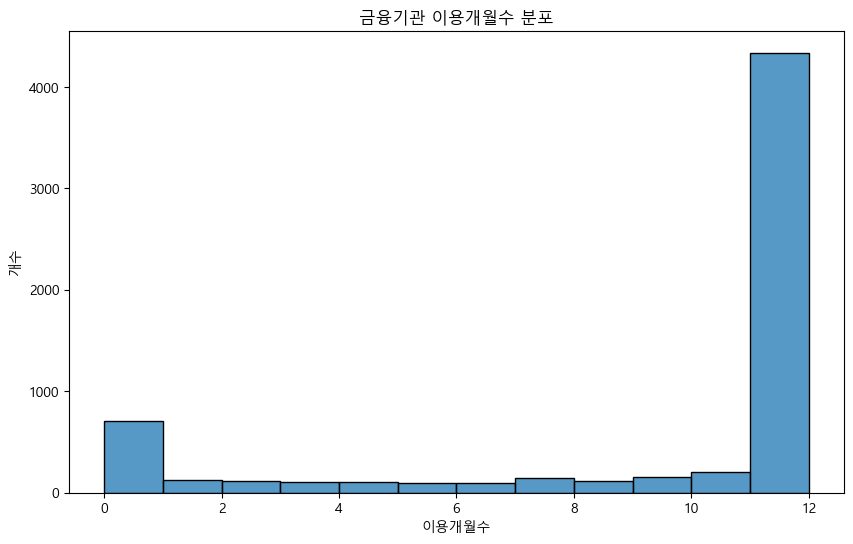

In [120]:
mon= df.loc[df['자격기준'] == 2, '이용개월수_신용_R12M']

plt.figure(figsize=(10, 6))
sns.histplot(mon, bins=12, kde=False)  
plt.xlabel('이용개월수')
plt.ylabel('개수')
plt.title('금융기관 이용개월수 분포')
plt.show()

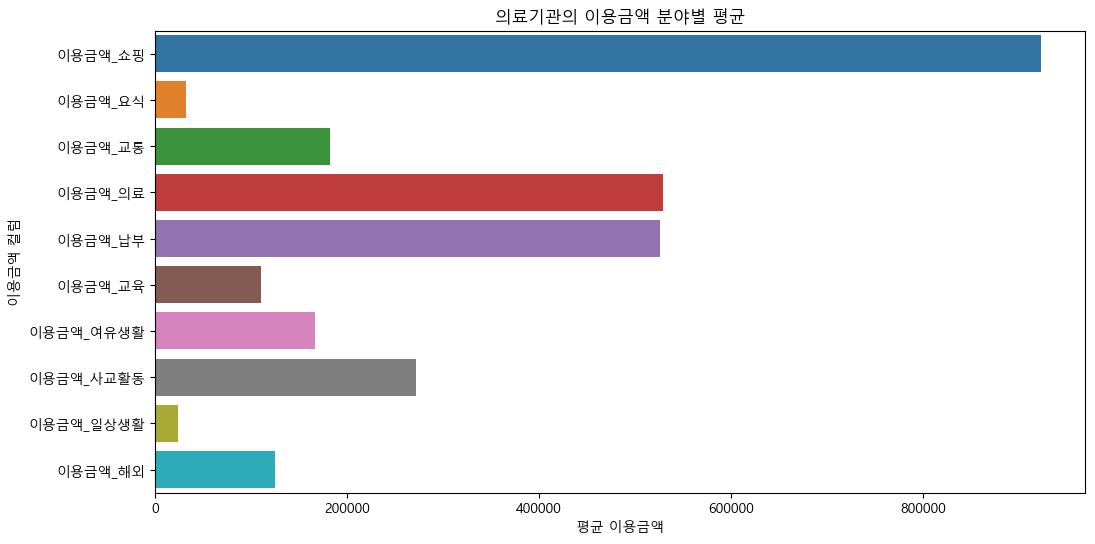

In [121]:
columns = ['이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_납부',
                 '이용금액_교육', '이용금액_여유생활', '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외']
avg = df.loc[df['자격기준'] == 3, columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg.values, y=avg.index)
plt.xlabel('평균 이용금액')
plt.ylabel('이용금액 컬럼')
plt.title('의료기관의 이용금액 분야별 평균')
plt.show()

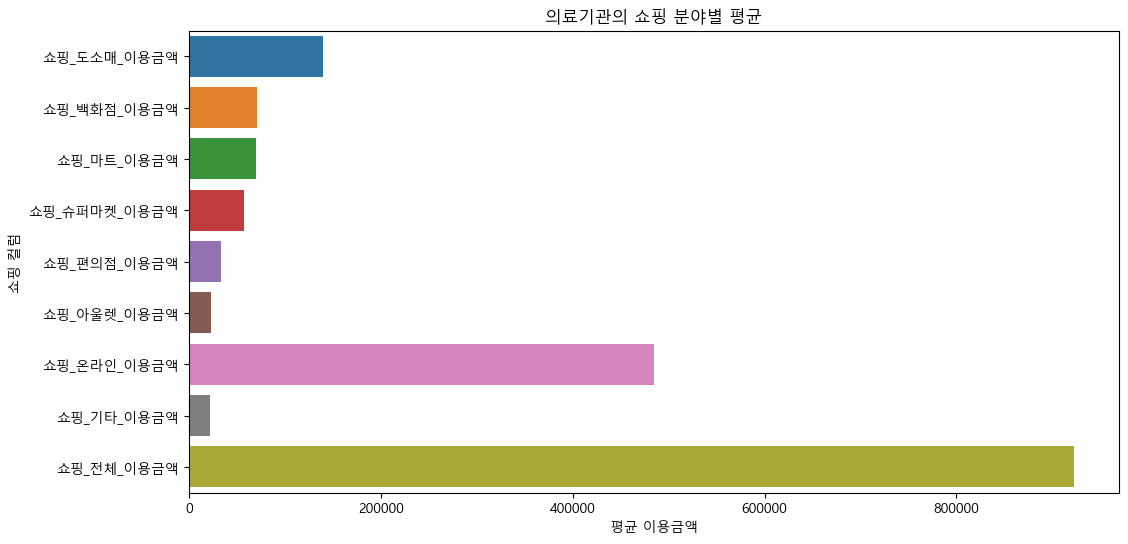

In [122]:
columns = ['쇼핑_도소매_이용금액', '쇼핑_백화점_이용금액', '쇼핑_마트_이용금액', '쇼핑_슈퍼마켓_이용금액',
                 '쇼핑_편의점_이용금액', '쇼핑_아울렛_이용금액', '쇼핑_온라인_이용금액', '쇼핑_기타_이용금액', '쇼핑_전체_이용금액']
avg = df.loc[df['자격기준'] == 3, columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg.values, y=avg.index)
plt.xlabel('평균 이용금액')
plt.ylabel('쇼핑 컬럼')
plt.title('의료기관의 쇼핑 분야별 평균')
plt.show()

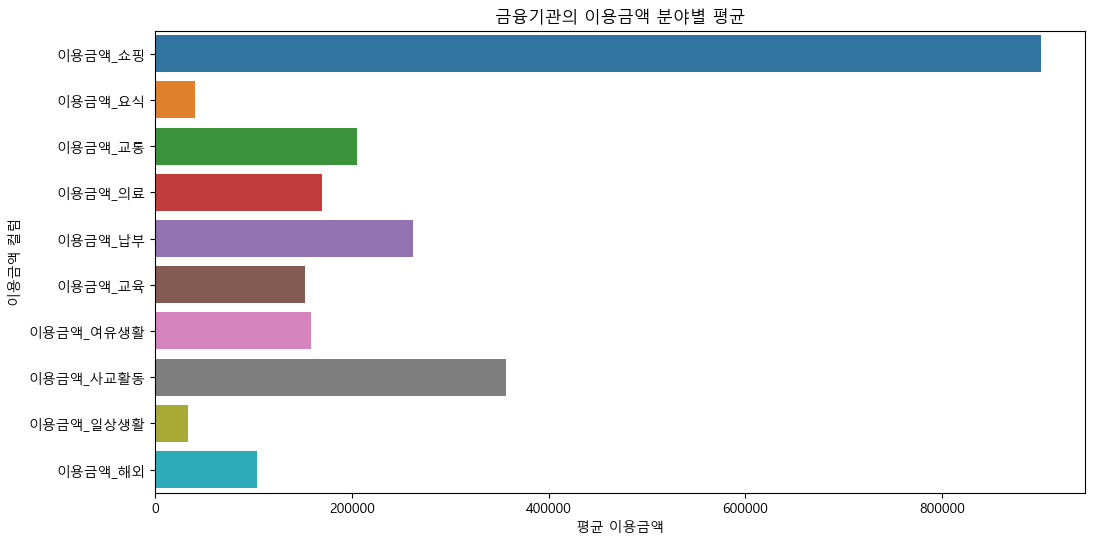

In [123]:
columns = ['이용금액_쇼핑', '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_납부',
                 '이용금액_교육', '이용금액_여유생활', '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외']
avg = df.loc[df['자격기준'] == 2, columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg.values, y=avg.index)
plt.xlabel('평균 이용금액')
plt.ylabel('이용금액 컬럼')
plt.title('금융기관의 이용금액 분야별 평균')
plt.show()

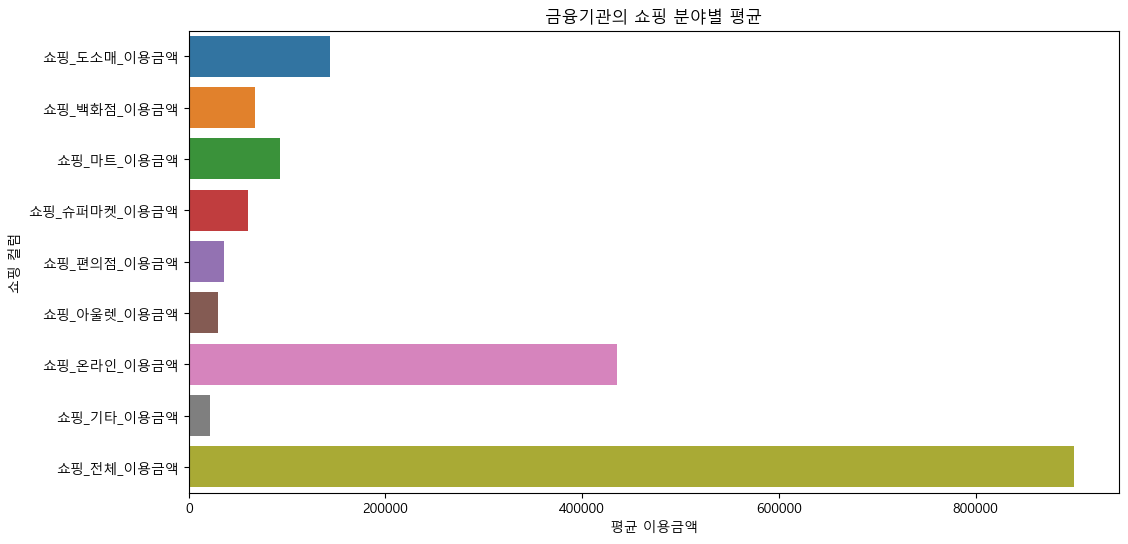

In [124]:
columns = ['쇼핑_도소매_이용금액', '쇼핑_백화점_이용금액', '쇼핑_마트_이용금액', '쇼핑_슈퍼마켓_이용금액',
                 '쇼핑_편의점_이용금액', '쇼핑_아울렛_이용금액', '쇼핑_온라인_이용금액', '쇼핑_기타_이용금액', '쇼핑_전체_이용금액']
avg = df.loc[df['자격기준'] == 2, columns].mean()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg.values, y=avg.index)
plt.xlabel('평균 이용금액')
plt.ylabel('쇼핑 컬럼')
plt.title('금융기관의 쇼핑 분야별 평균')
plt.show()

# 온라인 vs 오프라인

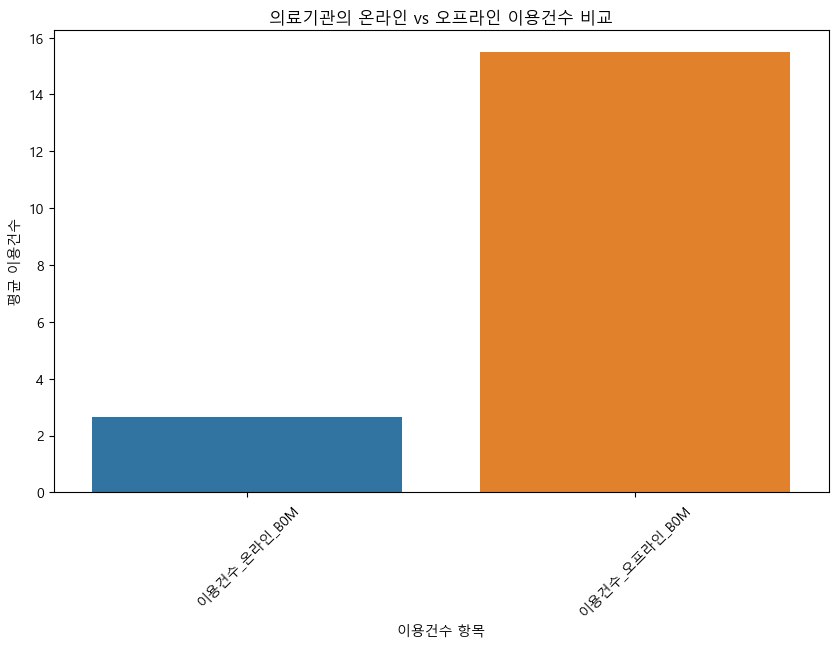

In [125]:
columns = ['이용건수_온라인_B0M', '이용건수_오프라인_B0M']
avg = df.loc[df['자격기준'] == 3, columns].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=columns, y=avg.values)
plt.xlabel('이용건수 항목')
plt.ylabel('평균 이용건수')
plt.title('의료기관의 온라인 vs 오프라인 이용건수 비교')
plt.xticks(rotation=45)
plt.show()